In [20]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas as pd#gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning, it
%matplotlib inline

import itertools
import json

import pandas

In [21]:
# read in dataframes separated by year
movie_df = pd.read_csv("/Users/laurenbeard/Desktop/compContentAnalysis/Content-Analysis-2020/final/movie_df_2000_2020_n75.csv")

In [22]:
len(movie_df)

75

In [23]:
movie_df.head()

,Unnamed: 0,Movie Name,Genre,Year,Country,Text,Tokenized Texts,normalized_tokens,normalized_tokens_count,normalized_tokens_POS,tokenized_sents,normalized_sents,tokenized_words,normalized_words
0,6426624,Sister Mary Explains It All,"Comedy, Drama",2001,English,"@@6426624 ? ( Trademark ) ? Praise my soul , t...","['Trademark', 'Praise', 'my', 'soul', 'the', '...","['trademark', 'praise', 'soul', 'king', 'heave...",3927,"[('@@6426624', 'NNP'), ('?', '.'), ('(', '-LRB...","[['@@6426624'], ['Trademark'], ['Praise', 'my'...","[['@@6426624'], ['trademark'], ['praise', 'sou...","['@@6426624', 'Trademark', 'Praise', 'my', 'so...","['@@6426624', 'trademark', 'praise', 'soul', '..."
1,6766000,ThanksKilling,"Comedy, Horror, Thriller",2009,English,@@6766000 [Birds_chirping] [Screaming] [Scream...,"['Birds_chirping', 'Screaming', 'Screaming_con...","['birds_chirping', 'scream', 'screaming_contin...",2960,"[('@@6766000', 'NNP'), ('[', '-LRB-'), ('birds...","[['@@6766000', 'Birds_chirping'], ['Screaming'...","[['@@6766000', 'birds_chirping'], ['scream'], ...","['@@6766000', 'Birds_chirping', 'Screaming', '...","['@@6766000', 'birds_chirping', 'screaming', '..."
2,4257009,The Brotherhood V: Alumni,"Horror, Thriller",2009,English,@@4257009 Betty ? Betty ? Betty ? Come on . Be...,"['Betty', 'Betty', 'Betty', 'Come', 'on', 'Bet...","['betty', 'betty', 'betty', 'come', 'betty', '...",1687,"[('@@4257009', 'NNP'), ('betty', 'NNP'), ('?',...","[['@@4257009'], ['Betty'], ['Betty'], ['Betty'...","[['@@4257009'], ['betty'], ['betty'], ['betty'...","['@@4257009', 'Betty', 'Betty', 'Betty', 'Come...","['@@4257009', 'betty', 'betty', 'betty', 'come..."
3,5800875,Anton Chekhov's The Duel,Drama,2010,"English, Spanish","@@5800875 Come on . Let wild . Come . Come , c...","['Come', 'on', 'Let', 'wild', 'Come', 'Come', ...","['come', 'let', 'wild', 'come', 'come', 'come'...",1505,"[('@@5800875', 'NNP'), ('come', 'VB'), ('on', ...","[['@@5800875', 'Come', 'on'], ['Let', 'wild'],...","[['@@5800875', 'come'], ['let', 'wild'], ['com...","['@@5800875', 'Come', 'on', 'Let', 'wild', 'Co...","['@@5800875', 'come', 'let', 'wild', 'come', '..."
4,6055372,The Last of Robin Hood,"Biography, Drama, Romance",2013,English,"@@6055372 The world is reeling . Errol Flynn ,...","['The', 'world', 'is', 'reeling', 'Errol', 'Fl...","['world', 'reel', 'errol', 'flynn', 'movie', '...",3339,"[('@@6055372', 'FW'), ('the', 'DT'), ('world',...","[['@@6055372', 'The', 'world', 'is', 'reeling'...","[['@@6055372', 'world', 'reel'], ['errol', 'fl...","['@@6055372', 'The', 'world', 'is', 'reeling',...","['@@6055372', 'world', 'reeling', 'errol', 'fl..."


In [24]:
# duplicate genre column named 'type'
movie_df['Type'] = movie_df['Genre']

In [63]:
# reduce to only single genre movies of interest
movie_singleGenre = movie_df.set_index(['Genre'])
# movie_df_subset = movie_singleGenre.loc[movie_singleGenre.index.isin(['Drama','Horror','Crime','Comedy','Action','Thriller','Western'])]
movie_df_subset = movie_singleGenre.loc[movie_singleGenre.index.isin(['Documentary','Drama','Comedy, Drama, Romance','Drama, Horror, Thriller','Documentary, Biography','Drama, Romance','Drama, Music, Romance','Comedy','Comedy, Drama','Biography, Drama','Music','Drama, Family, Romance','Horror','Drama, Thriller','Crime, Drama, Mystery','Action, Crime, Thriller','Drama, Fantasy, Romance','Documentary, Drama, Music','Action, Sci-Fi, Thriller','Biography, Drama, Fantasy','Action, Crime, Drama','Action, Adventure, Sci-Fi','Documentary, Crime, History','Comedy, Drama, Family','Biography, Drama, Romance','Crime, Drama, Thriller','Adventure, Comedy, Horror','Horror, Thriller','Comedy, Crime, Drama','Documentary, Short','Action, Thriller','Crime, Thriller','Short, Comedy','Documentary, Music','Adventure, Drama, Fantasy','Comedy, Romance','Drama, Mystery, Thriller','Sci-Fi, Thriller','Animation, Adventure, Sci-Fi','Action, Adventure, Crime','Animation, Adventure, Comedy','Animation, Family','Comedy, Horror, Thriller','Action, Comedy, Crime','Horror, Mystery, Thriller','Family','Biography, Drama, History','Action, Drama, Family','Horror, Sci-Fi','Comedy, Family, Romance','Animation, Adventure, Comedy, Family, Music, Mystery'])]

In [64]:
# convert the documents into word count vectors
#First it needs to be initialized
ngCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
movieVects = ngCountVectorizer.fit_transform(movie_df_subset['Text'])
print(movieVects.shape)

(74, 20334)


In [65]:
# To prune this matrix of features, we now limit our word vector to 1000 words with at least 3 occurrences, which do not occur in more than half of the documents.
#initialize
#movieTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
movieTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=1, stop_words='english', norm='l2')
#train
movieTFVects = movieTFVectorizer.fit_transform(movie_df_subset['Text'])

In [66]:
movie_df_subset['Text']

Genre
Comedy, Drama                @@6426624 ? ( Trademark ) ? Praise my soul , t...
Comedy, Horror, Thriller     @@6766000 [Birds_chirping] [Screaming] [Scream...
Horror, Thriller             @@4257009 Betty ? Betty ? Betty ? Come on . Be...
Drama                        @@5800875 Come on . Let wild . Come . Come , c...
Biography, Drama, Romance    @@6055372 The world is reeling . Errol Flynn ,...
                                                   ...                        
Documentary, Biography       @@5252220 [rustling] [mechanical_whirring] [bo...
Horror, Sci-Fi               @@5110668 You're going to be on live . Okay . ...
Action, Thriller             @@4835179 JAKE : In the summer of 2002 , I was...
Drama                        @@3338333 So this is it . The end of the world...
Crime, Drama, Thriller       @@6311585 All right , Earl . Next , come on , ...
Name: Text, Length: 74, dtype: object

In [67]:
# look at the words
try:
    print(movieTFVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(movieTFVectorizer.vocabulary_.keys())[:10]))

vector is missing
The available words are: ['trademark', 'soul', 'king', 'heaven', 'feet', 'sing', 'sun', 'moon', 'space', 'slow'] ...


In [68]:
movie_df['Tokenized Texts'] = movie_df['Text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
movie_df['normalized_tokens'] = movie_df['Tokenized Texts'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [69]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

In [70]:
movie_df['reduced_tokens'] = movie_df['normalized_tokens'].apply(lambda x: dropMissing(x, movieTFVectorizer.vocabulary_.keys()))

In [71]:
dictionary = gensim.corpora.Dictionary(movie_df['reduced_tokens'])

In [72]:
# Then for each of the texts we create a list of tuples containing each token and its count.
corpus = [dictionary.doc2bow(text) for text in movie_df['reduced_tokens']]

In [73]:
# Then we serialize the corpus as a file and load it.
gensim.corpora.MmCorpus.serialize('movie.mm', corpus)
moviemm = gensim.corpora.MmCorpus('movie.mm')

In [79]:
# Now we have a correctly formatted corpus that we can use for topic modeling and induction.
movielda = gensim.models.ldamodel.LdaModel(corpus=moviemm, id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

In [80]:
# We can inspect the degree to which distinct texts load on different topics. Here is 'Over the Hill':
# here, topic 0 primarily loads, followed by topic 4
movie1Bow = dictionary.doc2bow(movie_df['reduced_tokens'][0])
movie1lda = movielda[movie1Bow]
print("The topics of the text: {}".format(movie_df_subset['Movie Name'][0]))
print("are: {}".format(movie1lda))

The topics of the text: Sister Mary Explains It All
are: [(3, 0.99850285)]


In [81]:
# We can now see which topics our model predicts movie names load on and make this into a dataFrame for later analysis.
ldaDF = pandas.DataFrame({
        'Movie Name' : movie_df['Movie Name'],
        'topics' : [movielda[dictionary.doc2bow(l)] for l in movie_df['reduced_tokens']]
    })

In [82]:
# make each topic its own column:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(movielda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(movielda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF.head()

,Movie Name,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,Sister Mary Explains It All,"[(3, 0.9985029)]",0.0,0.0,0.000000,0.998503,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,ThanksKilling,"[(8, 0.99843484)]",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.998435,0.000000
2,The Brotherhood V: Alumni,"[(9, 0.99596214)]",0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.995962
3,Anton Chekhov's The Duel,"[(3, 0.78743166), (5, 0.20792592)]",0.0,0.0,0.000000,0.787432,0.000000,0.207926,0.0,0.0,0.000000,0.000000
4,The Last of Robin Hood,"[(2, 0.43046138), (4, 0.56742716)]",0.0,0.0,0.430461,0.000000,0.567427,0.000000,0.0,0.0,0.000000,0.000000


In [83]:
# let's visualize this for several (e.g., 10) documents in the corpus. First we'll subset the data
ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['Movie Name']]
ldaDFVis = ldaDFV.as_matrix(columns=None)
ldaDFVisNames = ldaDFVisN.as_matrix(columns=None)
ldaDFV

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0.000000,0.0,0.000000,0.998503,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.998435,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.995962
3,0.000000,0.0,0.000000,0.787432,0.000000,0.207926,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.430461,0.000000,0.567427,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.0,0.000000,0.995124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.0,0.976807,0.000000,0.000000,0.000000,0.021960,0.000000,0.000000,0.000000
7,0.054679,0.0,0.053148,0.000000,0.677651,0.121915,0.000000,0.091787,0.000000,0.000000
8,0.000000,0.0,0.000000,0.011700,0.000000,0.054635,0.548404,0.011548,0.372530,0.000000
9,0.000000,0.0,0.000000,0.039595,0.000000,0.956295,0.000000,0.000000,0.000000,0.000000


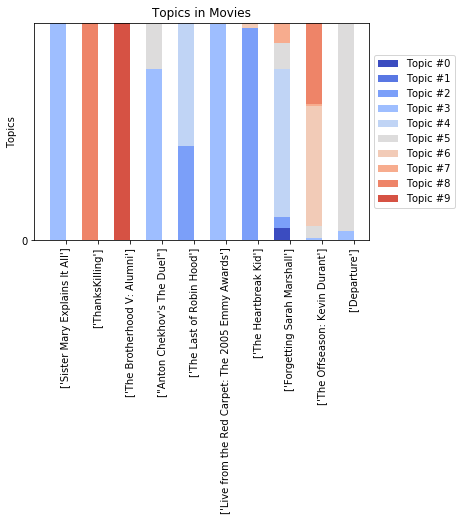

In [84]:
# First we can visualize as a stacked bar chart
# we can see here how different topics load across movies
N = 10
ind = np.arange(N)
K = movielda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Movies')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

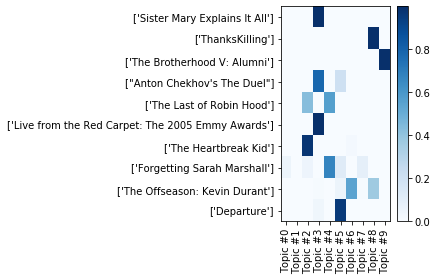

In [88]:
# We can also visualize as a heat map (shows results mirroring the bar charts)
plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

In [86]:
# We can also look at the top words from each topic to get a sense of the semantic (or syntactic) domain they represent. 
# To look at the terms with the highest LDA weight in topic 1 we can do the following:
movielda.show_topic(1)

[('fuck', 0.012099895),
 ('ron', 0.011581295),
 ('ralph', 0.011378238),
 ('game', 0.010075816),
 ('shoot', 0.007779301),
 ('dad', 0.006107568),
 ('win', 0.006093505),
 ('medal', 0.006035247),
 ('drive', 0.0057344222),
 ('alright', 0.0052621784)]

In [87]:
# if we want to make a dataFrame:
topicsDict = {}
for topicNum in range(movielda.num_topics):
    topicWords = [w for w, p in movielda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,Topic_6,Topic_7,Topic_8,Topic_9
0,buddha,fuck,jerry,song,fuck,fuck,fuck,fuck,johnny,fuck
1,fuck,ron,fuck,fuck,ron,dude,jerry,tick,billy,betty
2,george,ralph,lewis,jesus,christmas,shoot,dad,song,darren,shoot
3,violin,game,dad,vote,dad,dad,princess,dude,kristen,vampire
4,gere,shoot,sam,die,connor,send,lose,ron,turkey,amy
5,teach,dad,eddie,child,shoot,party,carter,shoot,edward,lose
6,mickey,win,laugh,thomas,truth,lady,lewis,lose,fuck,george
7,death,medal,honey,lie,dude,fight,charlie,lie,die,ted
8,frank,drive,ride,sin,lose,lose,drive,nell,ali,rock
9,peter,alright,lose,lose,song,dance,whoa,death,dad,music
